<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)<a id="3.0_Exploratory_Data_Analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Importing-Packages-and-Libraries" data-toc-modified-id="Importing-Packages-and-Libraries-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing Packages and Libraries<a id="3.1_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Loading the Data<a id="3.2_Loading_Data"></a></a></span></li><li><span><a href="#Univariate-Data-Analysis" data-toc-modified-id="Univariate-Data-Analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Univariate Data Analysis<a id="3.3_Univariate_Data_Analysis"></a></a></span></li><li><span><a href="#Multivariate-Data-Analysis" data-toc-modified-id="Multivariate-Data-Analysis-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Multivariate Data Analysis<a id="3.4_Multivariate_Data_Analysis"></a></a></span></li><li><span><a href="#Checking-Ratio-of-Frauds-vs-Non-Frauds" data-toc-modified-id="Checking-Ratio-of-Frauds-vs-Non-Frauds-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Checking Ratio of Frauds vs Non-Frauds<a id="3.7_Checking_Ratio"></a></a></span></li><li><span><a href="#Combining-Attributes" data-toc-modified-id="Combining-Attributes-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Combining Attributes<a id="3.6_Combining_Attributes"></a></a></span></li><li><span><a href="#Summary-of-Exploratory-Data-Analysis-(EDA)-Steps" data-toc-modified-id="Summary-of-Exploratory-Data-Analysis-(EDA)-Steps-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Summary of Exploratory Data Analysis (EDA) Steps<a id="3.7_Summary_EDA"></a></a></span></li></ul></li></ul></div>

# Exploratory Data Analysis (EDA)<a id='3.0_Exploratory_Data_Analysis'></a>

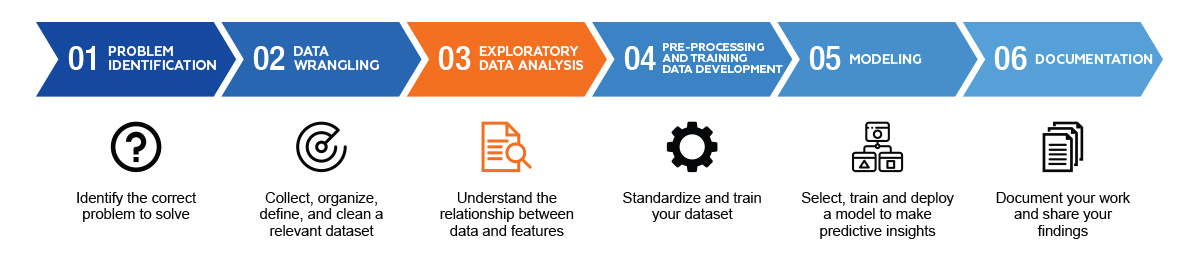

The focus of this Jupyter notebook is on the exploratory data analysis steps which are in continuation of steps done during the data wrangling phase and actions are based on the insights gained during that phase. The action steps are listed below:

- **Univariate data analysis** 
- **Multi-variate data analysis**
- Checking **Frauds vs. Non-Frauds** ratio for the data imbalance     
- Plotting Pie Chart for the **Frauds vs. Non-Frauds** data

In summary, the focus of this step is on making the data ready for the Pre-processing steps in the next phase of Pre-Processing and Training Data Development.

For the previous two notebooks i.e. for the problem identification and data wrangling steps, please click on the below links:

   1. For **Problem Identification Notebook** - [click here]()
   2. For **Data Wrangling Notebook**, [click here]()

## Importing Packages and Libraries<a id='3.1_Imports'></a>

In [1]:
# Importing required packages and libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

## Loading the Data<a id='3.2_Loading_Data'></a>

In [2]:
# Loading the required dataset
df = pd.read_csv('df_eda.csv')

df.head()

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0


In [3]:
# Checking data types
df.dtypes

Time      float64
Amount    float64
Class       int64
dtype: object

## Univariate Data Analysis<a id='3.3_Univariate_Data_Analysis'></a>

In [4]:
# Checking and counting of unique values of 'Class'
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

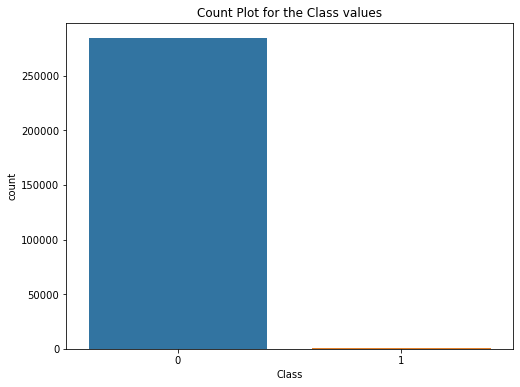

In [5]:
# Putting the class values in the visual format
plt.figure(figsize=(8,6))
sns.countplot(df['Class'])
plt.title("Count Plot for the Class values");

This shows that fradulent transactions with label '1' are in a very small number and the dataset is imbalanced. I will be using upsampling, downsampling and SMOTE to see what works best for this dataset.

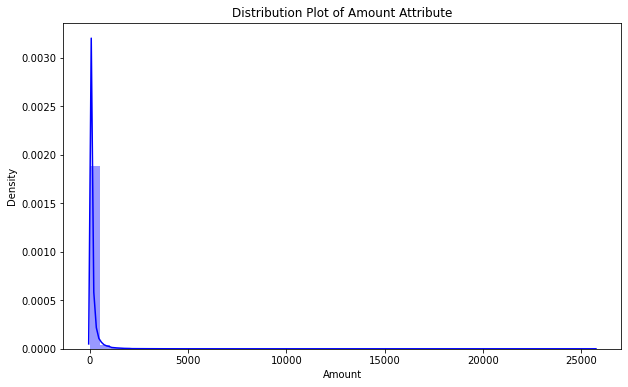

In [6]:
# Checking the distribution plot for the Amount column
plt.figure(figsize=(10,6))
sns.distplot(df['Amount'], color='blue')
plt.title("Distribution Plot of Amount Attribute")
plt.show();

This distribution is showing that the majority of the amount is in the lower range of around 1000. 

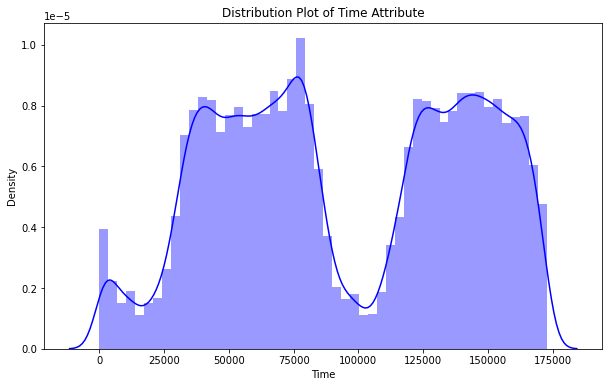

In [7]:
# Checking the distribution plot for the Time column
plt.figure(figsize=(10,6))
sns.distplot(df['Time'], color='blue')
plt.title("Distribution Plot of Time Attribute")
plt.show();

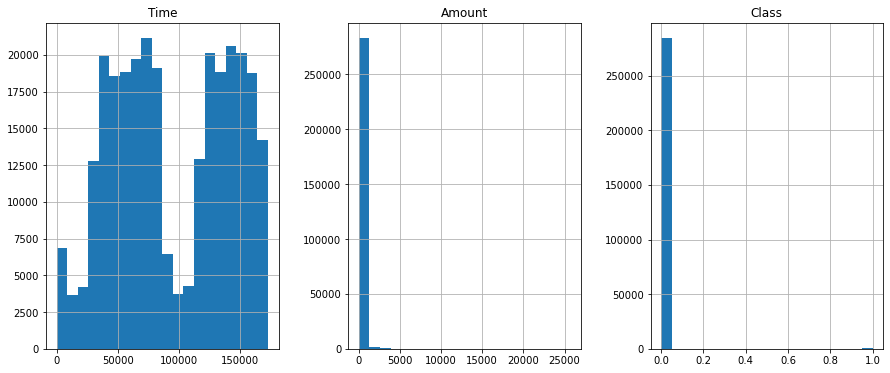

In [8]:
# Plotting the histograms of all the attributes
df.hist(bins=20, figsize=(15,6), layout=(1,3));

## Multivariate Data Analysis<a id='3.4_Multivariate_Data_Analysis'></a>

In [9]:
# Checking corr()
df.corr()

,Time,Amount,Class
Time,1.000000,-0.010596,-0.012323
Amount,-0.010596,1.000000,0.005632
Class,-0.012323,0.005632,1.000000


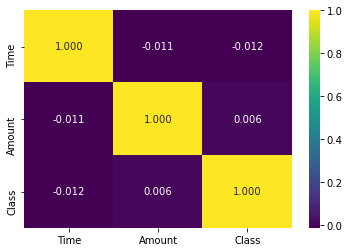

In [10]:
# Checking the correlation visually
sns.heatmap(df.corr(), annot=True, cmap='viridis',fmt='0.3f' );

## Checking Ratio of Frauds vs Non-Frauds<a id='3.7_Checking_Ratio'></a>

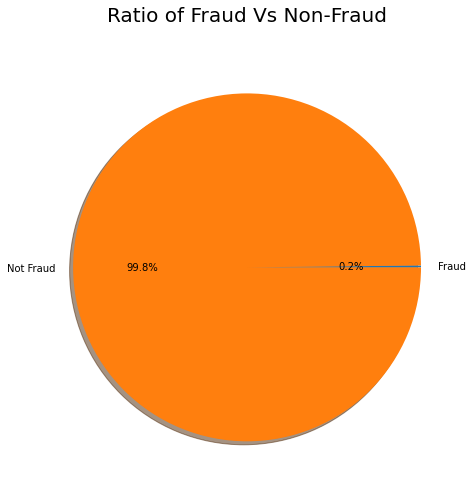

In [12]:
# Plotting the Pie Chart for the Class
fraud =len(df[df['Class']==1])
nonfraud = len(df[df['Class']==0])

labels = ['Fraud','Not Fraud']
values = [fraud,nonfraud]

# Plotting the pie chart for the frauds vs non-frauds
plt.figure(figsize=(12,8))
plt.pie(values, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Ratio of Fraud Vs Non-Fraud\n', fontsize=20)
sns.set_context("notebook", font_scale=2);

## Combining Attributes<a id='3.6_Combining_Attributes'></a>

In [13]:
# Bringing original data with attributes from V1 to V28 by loading it here
data = pd.read_csv('creditcard.csv')

In [14]:
# Dropping the Time, Amount and Class from the original data
data.drop(['Time','Amount','Class'], axis=1, inplace=True)

In [15]:
# Combining above data now with the Time, Amount and Class from the df dataset
df_data = pd.concat([data, df], axis=1)

In [16]:
# Checking the data again
df_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.0,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.0,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,2.0,69.99,0


In [17]:
# Saving data for the EDA phase
df_data.to_csv('data_eda', index=False)

## Summary of Exploratory Data Analysis (EDA) Steps<a id='3.7_Summary_EDA'></a>

Here is the summary of various steps done during the EDA phase:

- **Univariate data analysis** 
- **Multi-variate data analysis**
- Checking **Frauds vs. Non-Frauds** ratio for the data imbalance     
- Plotting Pie Chart for the **Frauds vs. Non-Frauds** data

After checking all the features, dataset was made ready for the next phase of the Pre-Processing and Training Data Development notebook.

Based on the above DSM methodology, a dedicated jupyter notebook was created to focus on one aspect at a time and you can refer these notebooks from the below links:

   1. For **Problem Identification Notebook** - [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/1_Problem_Identification_CreditCard_Frauds.ipynb)
   2. For **Data Wrangling Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/2_Data_Wrangling_CreditCard_Frauds.ipynb)
   3. For **Exploratory Data Analysis Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/3_EDA_CreditCard_Frauds.ipynb)
   4. For **Pre-Processing and Training Data Development Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/4_Preprocessing_CreditCard_Frauds.ipynb)
   5. For **Machine Learning Notebook**, [click here](https://github.com/jayguptacal/BankingAndInvestments/blob/main/CreditCardFraudDetection/5_MachineLearning_CreditCard_Frauds.ipynb)